# Cursos de Series de tiempo con *Machine Learning*
## Modulo. Modelo Sarimax 
                        Elaborado por: Naren Castellon

<center><img src="./imagen/sarimax_model.jpeg" width="700" height="500"></center>

# **Contenido**

1. Introducción
2. Definición del Modelo
3. Caso de estudio: Forecasting visita de cliente a Restaurantes
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con StatsModels
7. Evaluar el rendimiento del modelo.
8. Conclusion

# Introducción

Muchas veces, en el modelado de series temporales nos encontramos con casos en los que hay un factor externo que puede influir en el resultado de un período de tiempo determinado. Estos factores externos pueden considerarse variables exógenas o regresores. En este ejemplo, he tomado los visitantes diarios del restaurante para realizar un pronóstico a futuro. En su mayoría, los modelos de series temporales como AR, ARMA, ARIMA y también SARIMA se basan en variables endógenas o endógenas, básicamente todos los factores que actúan juntos y definen la naturaleza de la serie temporal. Naturalmente, en el caso de los visitantes del restaurante, la cantidad de visitantes cambiaría y dependería en gran medida de si un día en particular es un día normal o un feriado como los domingos, por ejemplo. El conjunto de datos contiene una característica separada llamada feriados donde el valor 1 significa que es un feriado.

# SARIMAX - Seasonal ARIMA con eXogenous regressor
definición formal del modelo SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors). El modelo SARIMAX es una extensión del modelo ARIMA que incorpora componentes estacionales y variables exógenas.

La notación formal para un modelo SARIMAX es:

$$SARIMAX(p,d,q)(P,D,Q)m$$

Donde:

- p: orden del término autoregresivo (AR)
- d: grado de diferenciación
- q: orden del término de media móvil (MA)
- P: orden del término AR estacional
- D: grado de diferenciación estacional
- Q: orden del término MA estacional
- m: número de períodos por temporada

La ecuación general del modelo SARIMAX se puede expresar de la siguiente manera:

$$Φ(B^m)φ(B)(1-B)^d(1-B^m)^D y_t = θ(B)Θ(B^m)ε_t + β'X_t$$

Donde:

- $y_t$ es la serie temporal observada en el tiempo $t$
- $ε_t$ es el término de error en el tiempo t (ruido blanco)
- $B$ es el operador de retardo $(By_t = y_{t-1})$
- $φ(B) = 1 - φ_1B - φ_2B^2 - ... - φ_pB^p$ es el polinomio AR no estacional
- $θ(B) = 1 + θ_1B + θ_2B^2 + ... + θ_qB^q$ es el polinomio MA no estacional
- $Φ(B^m) = 1 - Φ_1B^m - Φ_2B^{2m} - ... - Φ_PB^{Pm}$ es el polinomio AR estacional
- $Θ(B^m) = 1 + Θ_1B^m + Θ_2B^{2m} + ... + Θ_QB^{Qm}$ es el polinomio MA estacional
- $(1-B)^d$ es el operador de diferenciación no estacional
- $(1-B^m)^D$ es el operador de diferenciación estacional
- $X_t$ es un vector de variables exógenas en el tiempo $t$
- $β'$ es un vector de coeficientes para las variables exógenas

Desglosando los componentes:

1. Componente AR no estacional: $φ(B)$
2. Componente MA no estacional: $θ(B)$
3. Componente AR estacional: $Φ(B^m)$
4. Componente MA estacional: $Θ(B^m)$
5. Diferenciación no estacional: $(1-B)^d$
6. Diferenciación estacional: $(1-B^m)^D$
7. Componente exógeno: $β'X_t$

Esta ecuación combina todos estos elementos para modelar una serie temporal que puede tener tendencias, patrones estacionales y ser influenciada por variables externas.

El modelo SARIMAX es muy flexible y puede manejar una amplia gama de comportamientos de series temporales, incluyendo tendencias, estacionalidad y la influencia de factores externos. Sin embargo, la complejidad del modelo también significa que puede ser desafiante encontrar la especificación correcta y estimar los parámetros de manera eficiente.


# Caso de Estudio: Forecasting Visitas a una Cadena de Restaurantes


En el competitivo mundo de la restauración, la capacidad de prever con precisión la demanda de clientes es fundamental para optimizar la gestión de recursos, planificar inventarios y maximizar los ingresos. En este caso de estudio, exploraremos cómo una cadena de restaurantes puede utilizar técnicas de forecasting para predecir el número de visitas a sus establecimientos y tomar decisiones estratégicas basadas en estas predicciones.

#### Contexto

Imagine que gestionamos una cadena de restaurantes con ubicaciones en diversas ciudades. Nuestro objetivo es desarrollar un modelo de forecasting que nos permita prever con precisión el número de visitas diarias a cada uno de nuestros restaurantes. Para ello, contamos con datos históricos de visitas, así como información sobre variables relevantes como eventos especiales, promociones, días festivos y condiciones climáticas.

#### Metodología

1. **Recopilación de Datos:** Recolectamos datos históricos de visitas a cada restaurante, así como información relevante sobre eventos especiales, promociones y otras variables que podrían influir en la demanda.

2. **Análisis Exploratorio de Datos (EDA):** Realizamos un análisis exploratorio de los datos para identificar tendencias, estacionalidad, efectos de eventos especiales y posibles correlaciones entre las variables.

3. **Preprocesamiento de Datos:** Limpieza de datos, manejo de valores faltantes, codificación de variables categóricas, y creación de variables adicionales como indicadores de días festivos o eventos especiales.

4. **Selección del Modelo:** Consideramos varias técnicas de forecasting, como modelos ARIMA, modelos de suavizado exponencial, y modelos de regresión. Dada la naturaleza multivariada de nuestros datos, optamos por utilizar un modelo Sarima y Sarimax para capturar las interacciones entre las diferentes variables.

5. **Entrenamiento del Modelo:** Dividimos los datos en conjuntos de entrenamiento y prueba, y entrenamos el modelo VAR utilizando los datos históricos.

6. **Validación del Modelo:** Evaluamos la precisión del modelo utilizando métricas como el error cuadrático medio (MSE) y el error absoluto medio (MAE) en el conjunto de prueba.

7. **Generación de Predicciones:** Utilizamos el modelo entrenado para generar predicciones del número de visitas diarias para cada restaurante en un horizonte de tiempo futuro.

8. **Optimización y Ajuste:** Realizamos ajustes en el modelo según sea necesario para mejorar la precisión de las predicciones, teniendo en cuenta la retroalimentación recibida y los cambios en las condiciones del mercado.


#### Conclusiones

El forecasting preciso de visitas a una cadena de restaurantes es esencial para una gestión eficaz y rentable del negocio. Al utilizar técnicas avanzadas de análisis de series temporales como el modelo VAR, las cadenas de restaurantes pueden anticipar la demanda, adaptarse a las fluctuaciones del mercado y tomar decisiones informadas para mejorar la experiencia del cliente y maximizar los ingresos. Es crucial seguir monitorizando y ajustando continuamente el modelo de forecasting para garantizar su relevancia y precisión a medida que evolucionan las condiciones del mercado y las preferencias de los clientes.

## Cargar las librerias

In [1]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import numpy as np
import pandas as pd

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (18,6)

# Ocultar advertencia - Warning
# ==============================================================================
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

## Cargar los Datos

In [2]:
# Load the Restaurant visitors dataset
df = pd.read_csv('./data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


El tipo de datos de los visitantes del restaurante está en coma flotante. Veamos algunas filas adicionales.

In [3]:
df.index.freq = 'D'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [5]:
df.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

Bien, entonces hay NaN, pero Pandas no usa números enteros para representar los valores faltantes. Por lo tanto, son números de punto flotante. Finalmente, eliminaremos estas filas faltantes. Antes de eso, cambiemos el tipo de datos de la columna de visitantes del restaurante a int64.

In [6]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
# change the dtype of the restaurant columns
cols = ['rest1','rest2','rest3','rest4', "total"]

for col in cols:
    df1[col] = df1[col].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/3856725336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype(int)


## Análisis Exploratorio de Datos

In [9]:
df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


In [10]:
df1["mean"] = df1[['rest1', 'rest2', 'rest3','rest4',]].mean(axis = 1)
df1

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/3006708874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mean"] = df1[['rest1', 'rest2', 'rest3','rest4',]].mean(axis = 1)


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296,74.00
2016-01-02,Saturday,0,na,24,39,43,85,191,47.75
2016-01-03,Sunday,0,na,24,31,66,81,202,50.50
2016-01-04,Monday,0,na,23,18,32,32,105,26.25
2016-01-05,Tuesday,0,na,2,15,38,43,98,24.50
...,...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91,22.75
2017-04-19,Wednesday,0,na,20,11,30,18,79,19.75
2017-04-20,Thursday,0,na,22,3,19,46,90,22.50


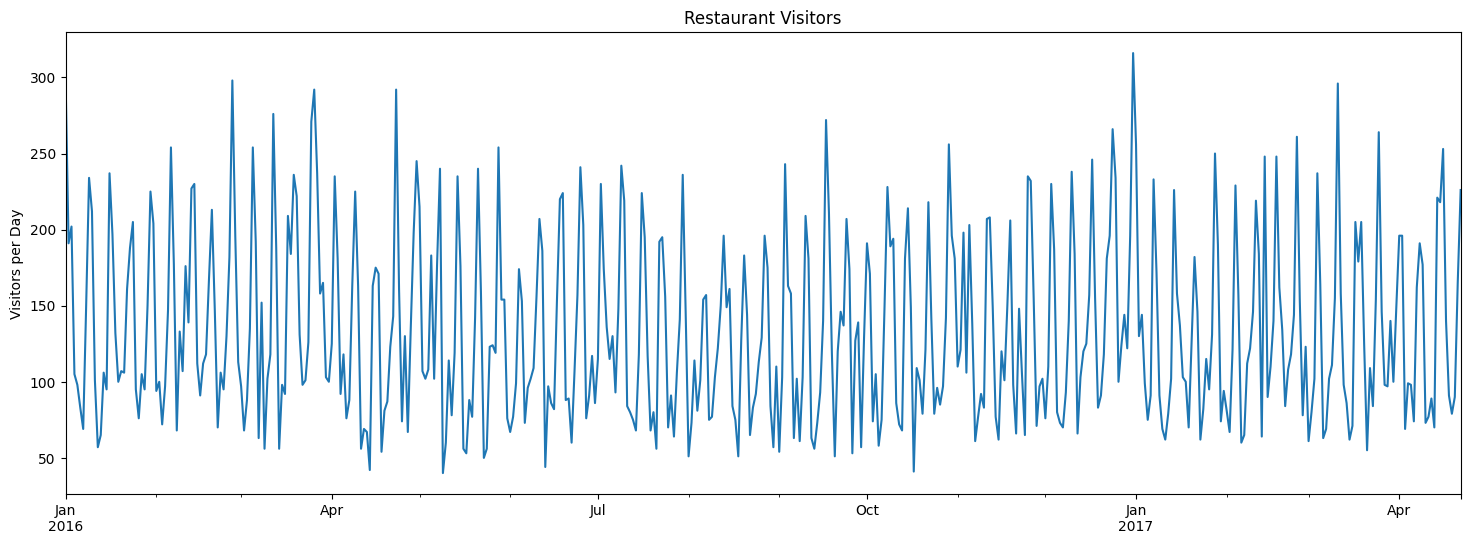

In [11]:
title = 'Restaurant Visitors'
xlabel = ''
ylabel = 'Visitors per Day'

ax = df1['total'].plot(title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

## Una mirada más cercana a los holidays
Intentemos sombrear las vacaciones en el gráfico existente

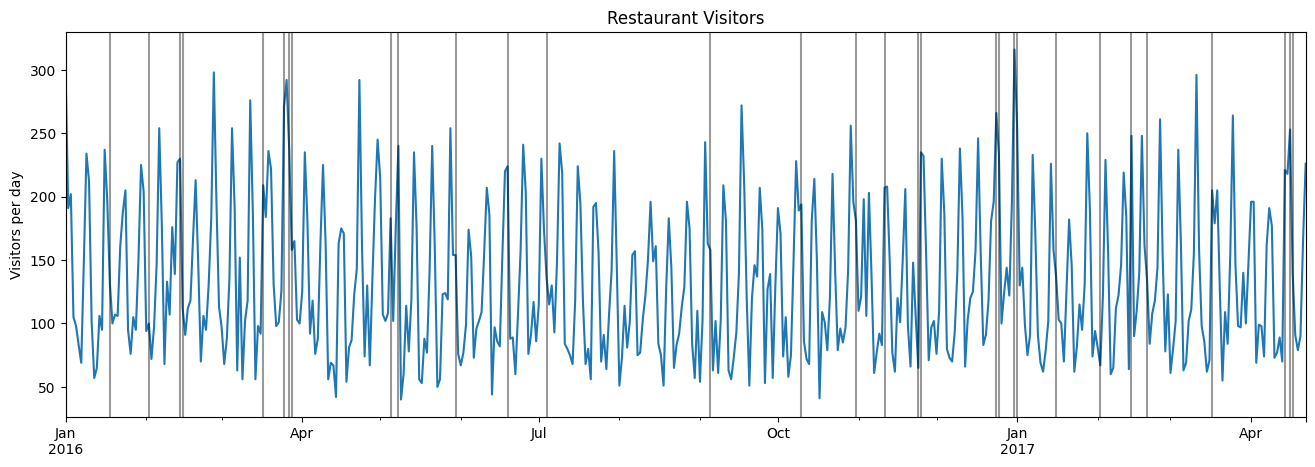

In [12]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for i in df1[df1['holiday']==1].index:
    ax.axvline(x=i,color='k',alpha=0.4)

In [ ]:
df1.columns

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/959827538.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df1, x = df1.index, y = 'rest1',  label = "Restaurante 1", linestyle="--", linewidth=2, ax = axes[0,1], palette = "Set2")
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/959827538.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df1, x = df1.index, y = 'rest2',  label = "Restaurante 2", linestyle="--", linewidth=2, ax = axes[1,0], palette = "Set2")
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/959827538.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df1, x = df1.index, y = 'rest3',  label = "Restaurante 3", linestyle="--", linewidth=2, ax = axes[1,1], palette = "Set2")
/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_9557/959827538.py:14: UserWarning: Ignoring `palette` beca

<Axes: xlabel='date', ylabel='mean'>

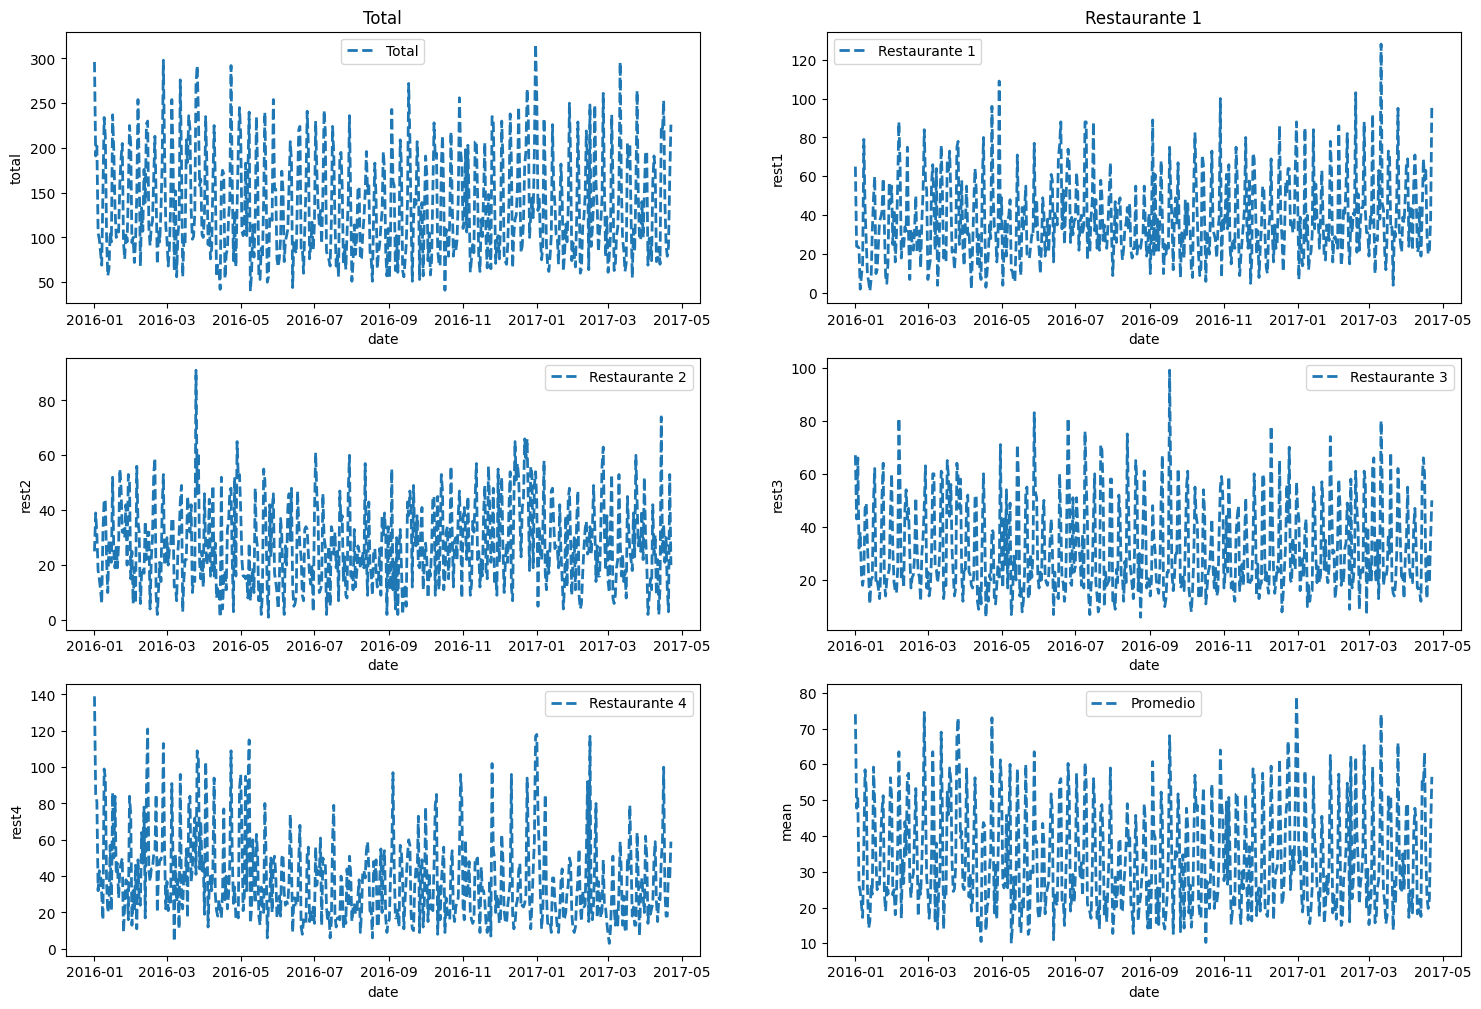

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
sns.lineplot(df1, x = df1.index, y = 'total',  label = "Total", linestyle="--", linewidth=2, ax = axes[0,0])
axes[0,0].set_title("Total")

sns.lineplot(df1, x = df1.index, y = 'rest1',  label = "Restaurante 1", linestyle="--", linewidth=2, ax = axes[0,1], palette = "Set2")
axes[0,1].set_title("Restaurante 1")

sns.lineplot(df1, x = df1.index, y = 'rest2',  label = "Restaurante 2", linestyle="--", linewidth=2, ax = axes[1,0], palette = "Set2")
#axes[1,0].set_title("Restaurante 2")

sns.lineplot(df1, x = df1.index, y = 'rest3',  label = "Restaurante 3", linestyle="--", linewidth=2, ax = axes[1,1], palette = "Set2")
#axes[1,1].set_title("Restaurante 3")

sns.lineplot(df1, x = df1.index, y = 'rest4',  label = "Restaurante 4", linestyle="--", linewidth=2, ax = axes[2,0], palette = "Set2")

sns.lineplot(df1, x = df1.index, y = 'mean',  label = "Promedio", linestyle="--", linewidth=2, ax = axes[2,1], palette = "Set2")
#axes[2,0].set_title("Restaurante 4")

<Axes: xlabel='date', ylabel='total'>

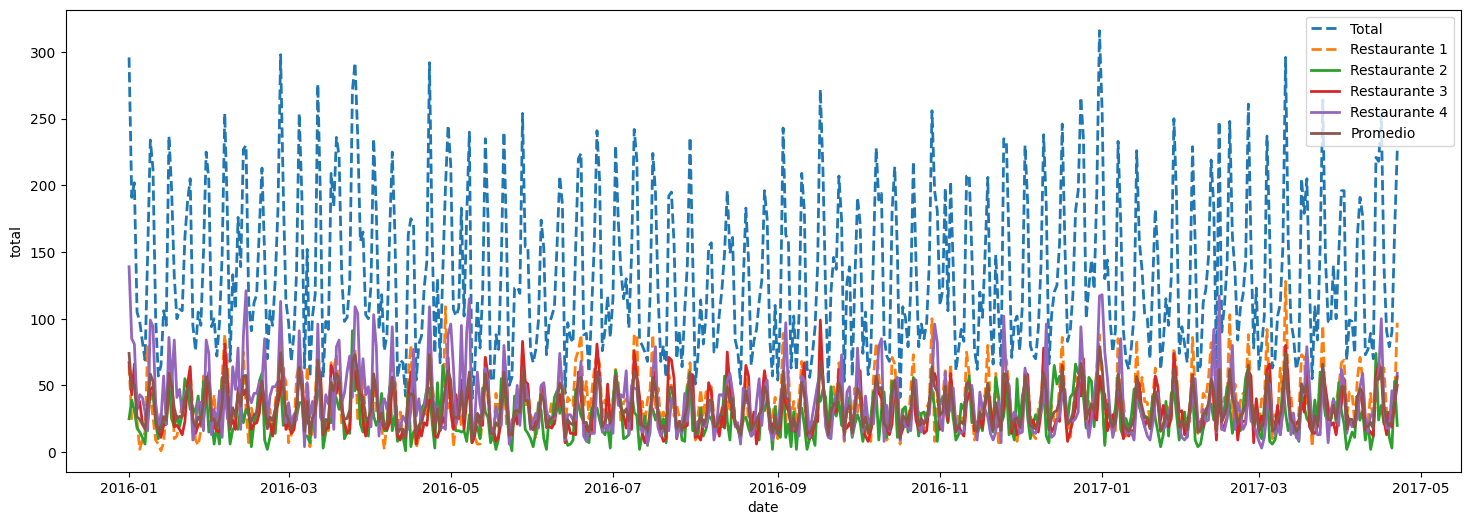

In [14]:
sns.lineplot(df1, x = df1.index, y = 'total',  label = "Total", linestyle="--", linewidth=2, )
sns.lineplot(df1, x = df1.index, y = 'rest1',  label = "Restaurante 1", linestyle="--", linewidth=2,)
sns.lineplot(df1, x = df1.index, y = 'rest2',  label = "Restaurante 2",  linewidth=2,)
sns.lineplot(df1, x = df1.index, y = 'rest3',  label = "Restaurante 3",  linewidth=2,)
sns.lineplot(df1, x = df1.index, y = 'rest4',  label = "Restaurante 4",  linewidth=2,)
sns.lineplot(df1, x = df1.index, y = 'mean',  label = "Promedio",  linewidth=2,)

<Axes: xlabel='date', ylabel='rest4'>

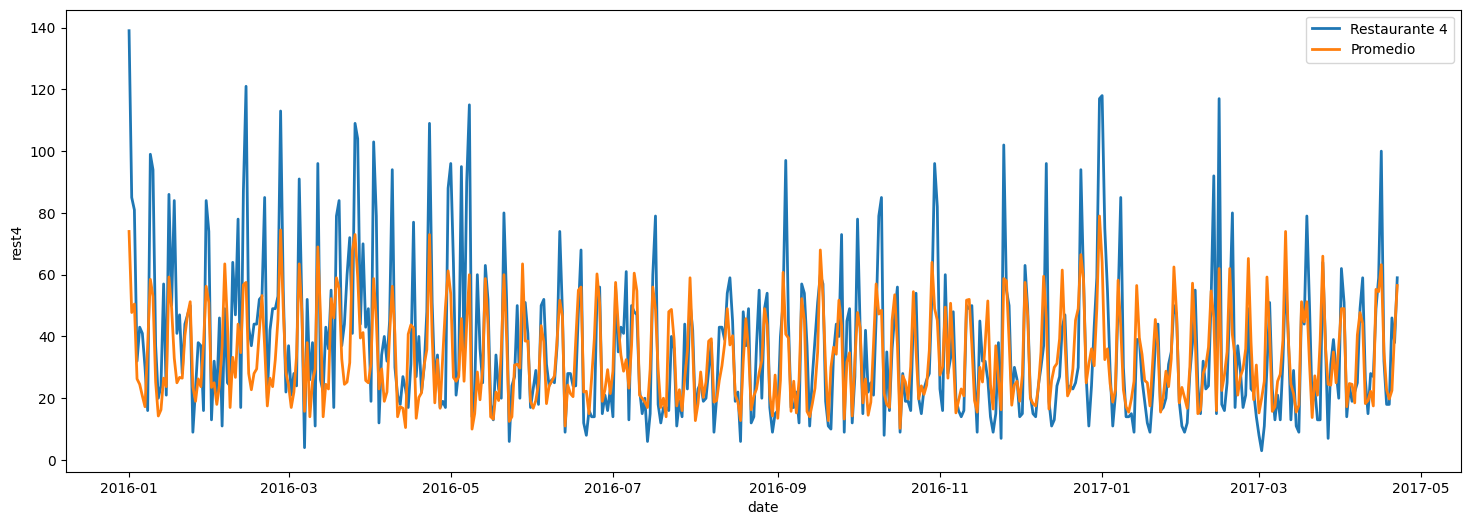

In [15]:
sns.lineplot(df1, x = df1.index, y = 'rest4',  label = "Restaurante 4",  linewidth=2,)
sns.lineplot(df1, x = df1.index, y = 'mean',  label = "Promedio",  linewidth=2,)

## Error Trend and Seasonality Decomposition

In [16]:
result = seasonal_decompose(df1['total'])

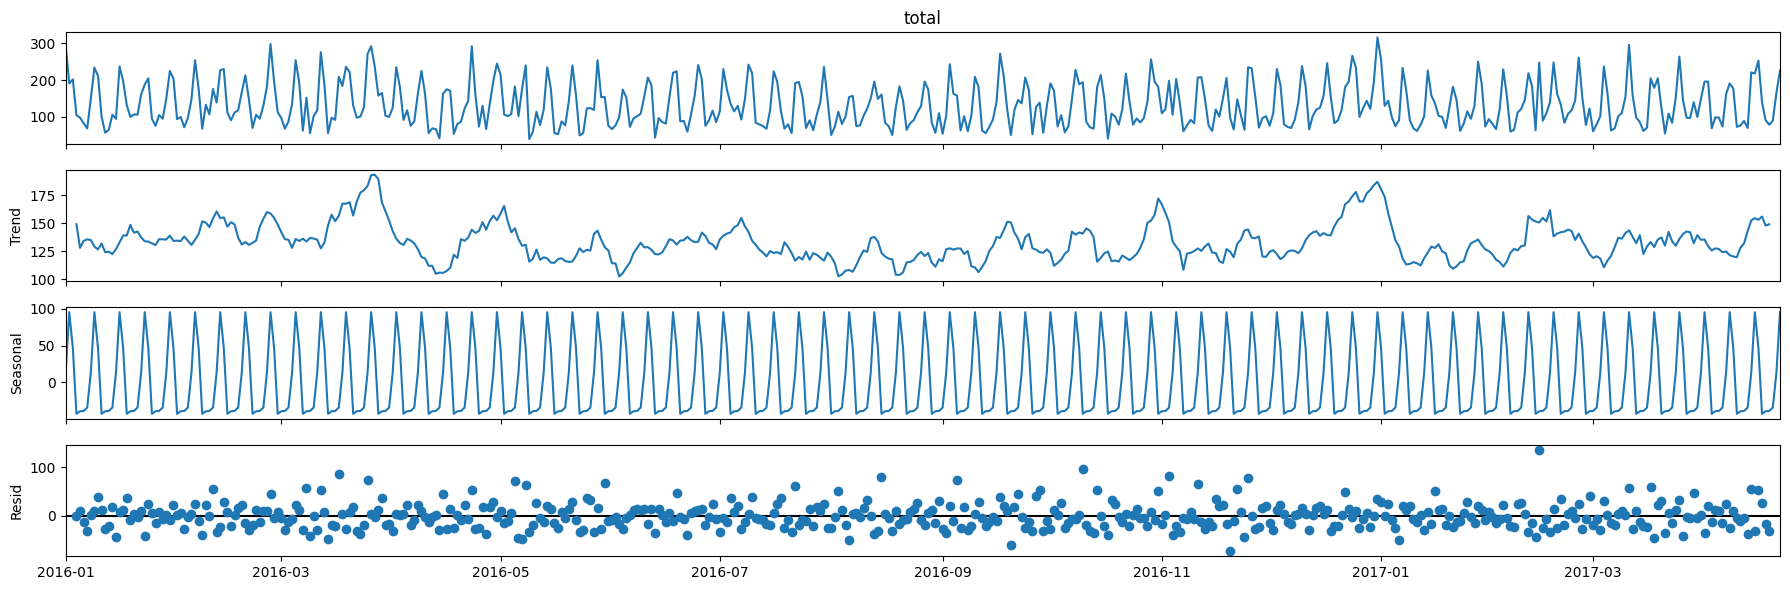

In [17]:
result.plot();

## Prueba de Estacionariedad
### Augmented Dickey Fuller Test for Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def dickey_fuller(series,title = 'La prueba de Dickey Fuller de su conjunto de datos revela lo siguiente sobre la estacionariedad'):
    '''This function takes a series and returns whether the time series is stationary or not.
    The result is based on the p-value returned by the dickey fuller test    
    '''
    
    print(f'Prueba de estacionariedad mediante la prueba de Dickey Fuller del conjunto de datos {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','# observations']
    
    out = pd.Series(data=result[0:4],index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Fuerte evidencia contra la hipótesis nula")
        print("Rechazar la hipótesis nula")
        print("Los datos no tienen raíz unitaria y son estacionarios")
    else:
        print("Evidencia débil contra la hipótesis nula")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos tienen una raíz unitaria y no son estacionarios.")         
    

In [20]:
dickey_fuller(df1['total'])

Prueba de estacionariedad mediante la prueba de Dickey Fuller del conjunto de datos La prueba de Dickey Fuller de su conjunto de datos revela lo siguiente sobre la estacionariedad
ADF test statistics      -5.592497
p-value                   0.000001
#lags                    18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Fuerte evidencia contra la hipótesis nula
Rechazar la hipótesis nula
Los datos no tienen raíz unitaria y son estacionarios


In [21]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

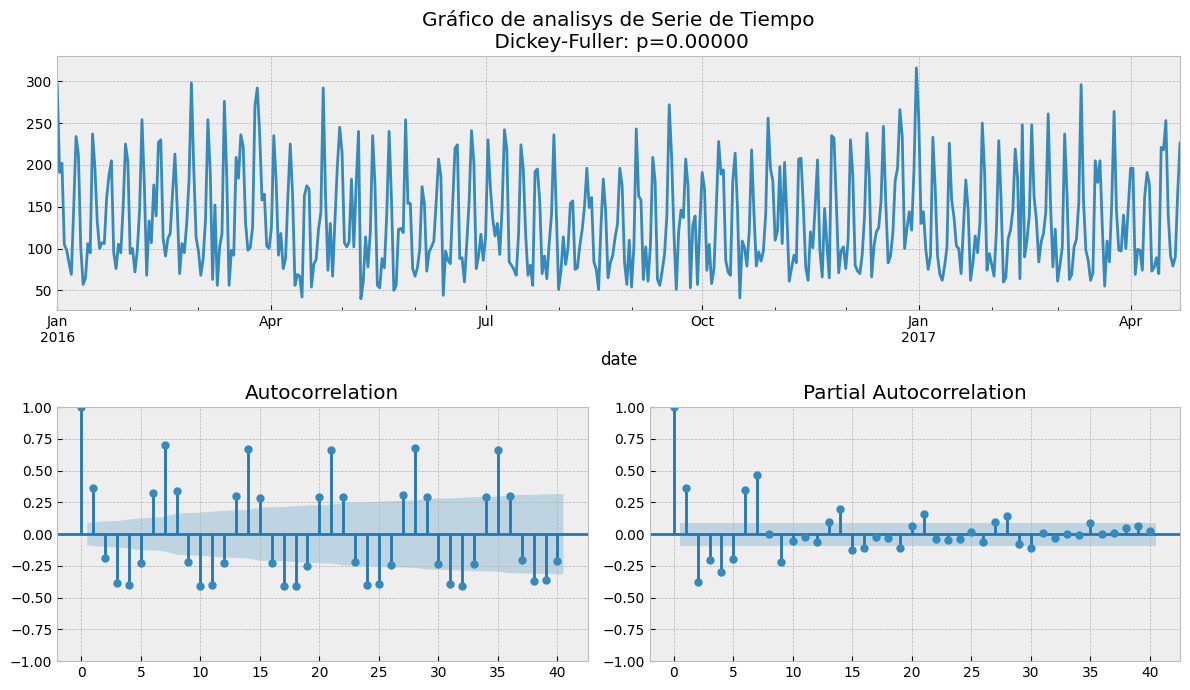

In [22]:
tsplot(df1['total'], lags = 40);

## Ejecute `pmdarima` para obtener los términos recomendados (p,d,q)(P,D,Q)m

In [23]:
#warnings.filterwarnings(action='ignore',message='')
auto_arima(df1['total'], start_p = 1, start_q = 1, test='adf',
           
                         seasonal = True, m = 7, 
                         trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=1.95 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=3.68 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=12.09 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4804.718, Time=3.45 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=1.43 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4948.941, Time=4.94 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=2.81 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4774.698, Time=3.28 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

## Split into train and test set

In [24]:
len(df1)

478

## División de los datos 

* Datos de Entrenamiento
* Datos de Prueba

Vamos a utilizar los 42 días para probar o evaluar nuestro modelo `Sarimax`

In [25]:
train = df1.iloc[:436]
test = df1.iloc[436:]

train.shape, test.shape

((436, 9), (42, 9))

In [26]:
train

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296,74.00
2016-01-02,Saturday,0,na,24,39,43,85,191,47.75
2016-01-03,Sunday,0,na,24,31,66,81,202,50.50
2016-01-04,Monday,0,na,23,18,32,32,105,26.25
2016-01-05,Tuesday,0,na,2,15,38,43,98,24.50
...,...,...,...,...,...,...,...,...,...
2017-03-07,Tuesday,0,na,28,9,19,13,69,17.25
2017-03-08,Wednesday,0,na,27,19,35,21,102,25.50
2017-03-09,Thursday,0,na,63,22,13,13,111,27.75


In [27]:
test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2017-03-12,Sunday,0,na,46,16,55,41,158,39.50
2017-03-13,Monday,0,na,43,24,18,13,98,24.50
2017-03-14,Tuesday,0,na,21,14,22,29,86,21.50
2017-03-15,Wednesday,0,na,12,18,21,11,62,15.50
2017-03-16,Thursday,0,na,30,8,24,9,71,17.75
2017-03-17,Friday,1,St. Patrick's Day,73,45,37,50,205,51.25
2017-03-18,Saturday,0,na,71,34,30,44,179,44.75
2017-03-19,Sunday,0,na,33,25,68,79,205,51.25
2017-03-20,Monday,0,na,34,22,19,50,125,31.25


* Nuestro objetivo es realizar el `Forecasting` del `Total de Visitas del Restaurante`

## Fit the SARIMA Model

In [28]:
model1 = SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7), enforce_invertibility=False)

# Entrenamos el modelo
resultado1 = model1.fit()

# Nos muestra el Resumen del Modelo
resultado1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01719D+00    |proj g|=  2.16331D-01


 This problem is unconstrained.



At iterate    5    f=  5.00116D+00    |proj g|=  6.29841D-03

At iterate   10    f=  4.98483D+00    |proj g|=  2.05776D-02

At iterate   15    f=  4.98473D+00    |proj g|=  2.13364D-02

At iterate   20    f=  4.97979D+00    |proj g|=  1.52957D-01

At iterate   25    f=  4.96699D+00    |proj g|=  2.26029D-02

At iterate   30    f=  4.96644D+00    |proj g|=  5.76657D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     43      1     0     0   4.642D-05   4.966D+00
  F =   4.9664420987630464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Thu, 26 Sep 2024   AIC                           4336.738
Time:                           14:46:15   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.56e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.210      0.000      -0.985      -0.891
sigma2      1111.8047     58.742     18.927      0.000     996.673    1226.937
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Obtenga los valores previstos y compárelos con los valores de prueba reales

In [29]:
end = len(train) + len(test) - 1
end

477

In [30]:
start = len(train)
end = len(train) + len(test) - 1
pred1 = resultado1.predict(start = start,end = end,dynamic = False).rename('SARIMA(0,0,0)(1,0,[1],7) Predictions')
pred1

2017-03-12    172.108408
2017-03-13     87.862738
2017-03-14     99.903552
2017-03-15     96.839607
2017-03-16     98.639304
2017-03-17    140.731245
2017-03-18    235.743933
2017-03-19    172.091049
2017-03-20     87.853876
2017-03-21     99.893475
2017-03-22     96.829840
2017-03-23     98.629355
2017-03-24    140.717051
2017-03-25    235.720155
2017-03-26    172.073692
2017-03-27     87.845015
2017-03-28     99.883400
2017-03-29     96.820074
2017-03-30     98.619407
2017-03-31    140.702858
2017-04-01    235.696380
2017-04-02    172.056336
2017-04-03     87.836154
2017-04-04     99.873325
2017-04-05     96.810308
2017-04-06     98.609461
2017-04-07    140.688666
2017-04-08    235.672608
2017-04-09    172.038982
2017-04-10     87.827295
2017-04-11     99.863252
2017-04-12     96.800544
2017-04-13     98.599515
2017-04-14    140.674476
2017-04-15    235.648837
2017-04-16    172.021630
2017-04-17     87.818437
2017-04-18     99.853180
2017-04-19     96.790780
2017-04-20     98.589570


Pasar `dynamic=False` significa que los pronósticos en cada punto se generan utilizando el historial completo hasta ese punto (todos los valores rezagados).

### Plot the predicted and the real test values

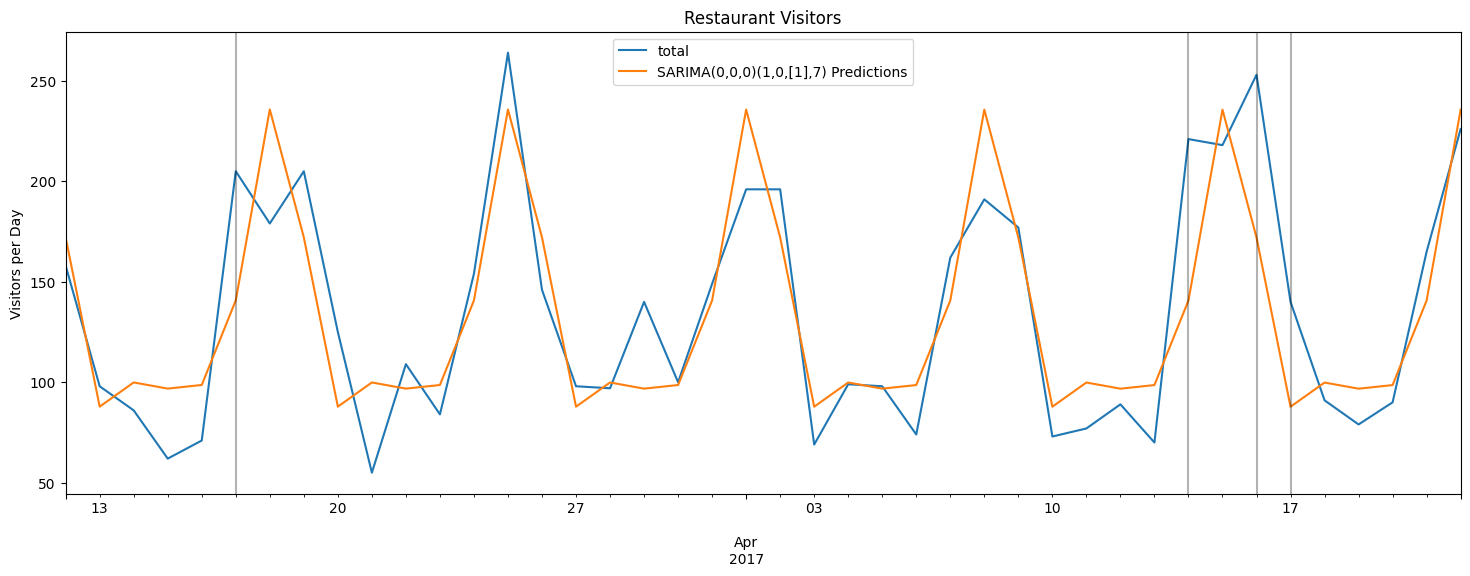

In [31]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

## Evaluate the Model

In [32]:
from statsmodels.tools.eval_measures import mse,rmse

In [33]:
mse_error = mse(test['total'],pred1)
rmse_error = rmse(test['total'],pred1)

In [34]:
print(f'SARIMA(0,0,0)(1,0,[1],7) MSE Error: {mse_error:11.10}')
print(f'SARIMA(0,0,0)(0,0,[1],7) RMSE Error: {rmse_error:11.10}')

SARIMA(0,0,0)(1,0,[1],7) MSE Error: 1018.371644
SARIMA(0,0,0)(0,0,[1],7) RMSE Error: 31.91193577


## Ahora incluiremos la variable exog

In [35]:
train

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296,74.00
2016-01-02,Saturday,0,na,24,39,43,85,191,47.75
2016-01-03,Sunday,0,na,24,31,66,81,202,50.50
2016-01-04,Monday,0,na,23,18,32,32,105,26.25
2016-01-05,Tuesday,0,na,2,15,38,43,98,24.50
...,...,...,...,...,...,...,...,...,...
2017-03-07,Tuesday,0,na,28,9,19,13,69,17.25
2017-03-08,Wednesday,0,na,27,19,35,21,102,25.50
2017-03-09,Thursday,0,na,63,22,13,13,111,27.75


* Agregamos la variable `Holiday`

In [36]:
model2 = SARIMAX(train['total'],exog = train[['holiday']],order = (0,0,0),seasonal_order = (1,0,[1],7),enforce_invertibility = False)
resultado2 = model2.fit()
resultado2.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24304D+00    |proj g|=  2.24823D-01

At iterate    5    f=  5.22744D+00    |proj g|=  5.66901D-03

At iterate   10    f=  5.21460D+00    |proj g|=  4.62718D-01

At iterate   15    f=  5.13771D+00    |proj g|=  2.82271D-02

At iterate   20    f=  5.12439D+00    |proj g|=  3.60885D-01

At iterate   25    f=  4.92080D+00    |proj g|=  1.76404D-01

At iterate   30    f=  4.81700D+00    |proj g|=  1.07505D-01

At iterate   35    f=  4.81325D+00    |proj g|=  1.39615D-04

At iterate   40    f=  4.81323D+00    |proj g|=  2.08039D-02

At iterate   45    f=  4.81295D+00    |proj g|=  4.23248D-02

At iterate   50    f=  4.81287D+00    |proj g|=  7.90917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Thu, 26 Sep 2024   AIC                           4204.823
Time:                           14:48:35   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6487      3.968     17.552      0.000      61.871      77.426
ar.S.L7        0.9999   7.58e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.386      0.000      -0.989      -0.897
sigma2       813.5378     47.379     17.171      0.000     720.677     906.398
===================================================================================
Ljung-Box (L1) (Q):                  15.58   Jarque-Bera (JB):                20.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Obtain the predicted values
start = len(train)
end = len(train)+len(test)-1
exog_forecast = test[['holiday']] 
pred2 =  resultado2.predict(start =start,end=end,exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,[1],7) Predictions')
pred2

2017-03-12    166.665826
2017-03-13     76.817336
2017-03-14     95.893476
2017-03-15     96.779336
2017-03-16     93.457159
2017-03-17    207.183618
2017-03-18    230.884082
2017-03-19    166.654567
2017-03-20     76.812147
2017-03-21     95.886998
2017-03-22     96.772798
2017-03-23     93.450845
2017-03-24    137.525618
2017-03-25    230.868485
2017-03-26    166.643309
2017-03-27     76.806958
2017-03-28     95.880520
2017-03-29     96.766261
2017-03-30     93.444532
2017-03-31    137.516327
2017-04-01    230.852889
2017-04-02    166.632051
2017-04-03     76.801769
2017-04-04     95.874043
2017-04-05     96.759724
2017-04-06     93.438220
2017-04-07    137.507038
2017-04-08    230.837294
2017-04-09    166.620795
2017-04-10     76.796581
2017-04-11     95.867566
2017-04-12     96.753187
2017-04-13     93.431908
2017-04-14    207.146458
2017-04-15    230.821700
2017-04-16    236.258248
2017-04-17    146.440103
2017-04-18     95.861090
2017-04-19     96.746651
2017-04-20     93.425596


In [38]:
test[['holiday']][:10]

,holiday
date,
2017-03-12,0
2017-03-13,0
2017-03-14,0
2017-03-15,0
2017-03-16,0
2017-03-17,1
2017-03-18,0
2017-03-19,0
2017-03-20,0


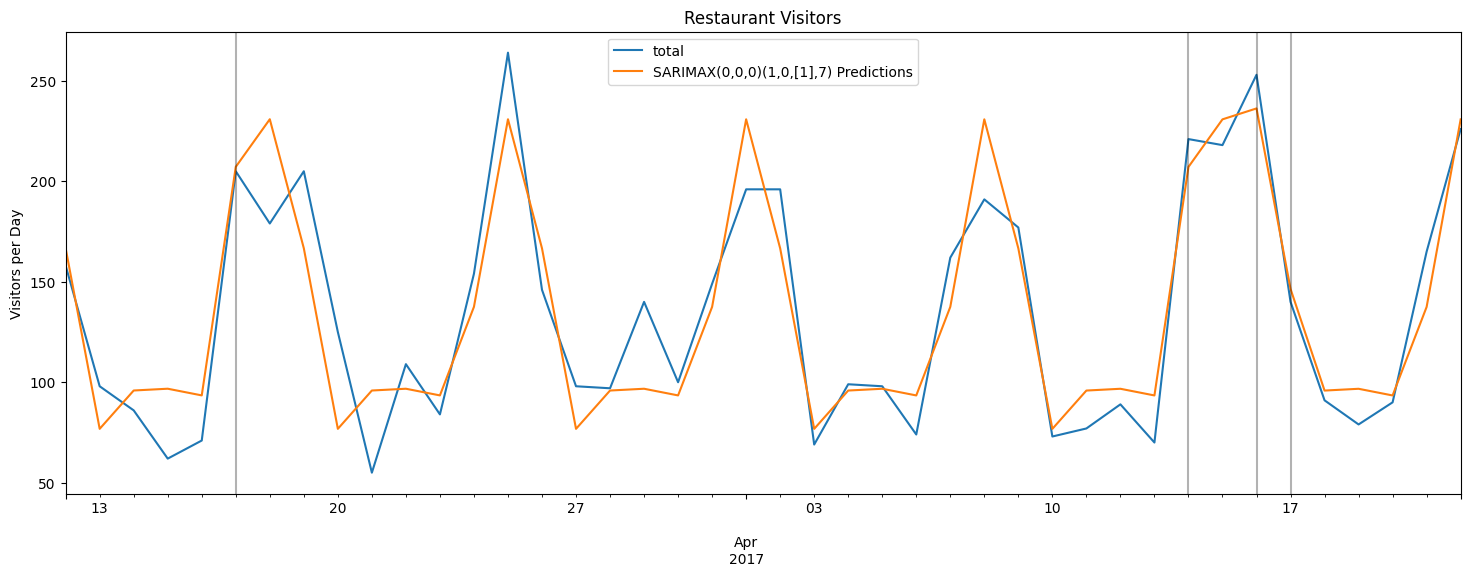

In [39]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

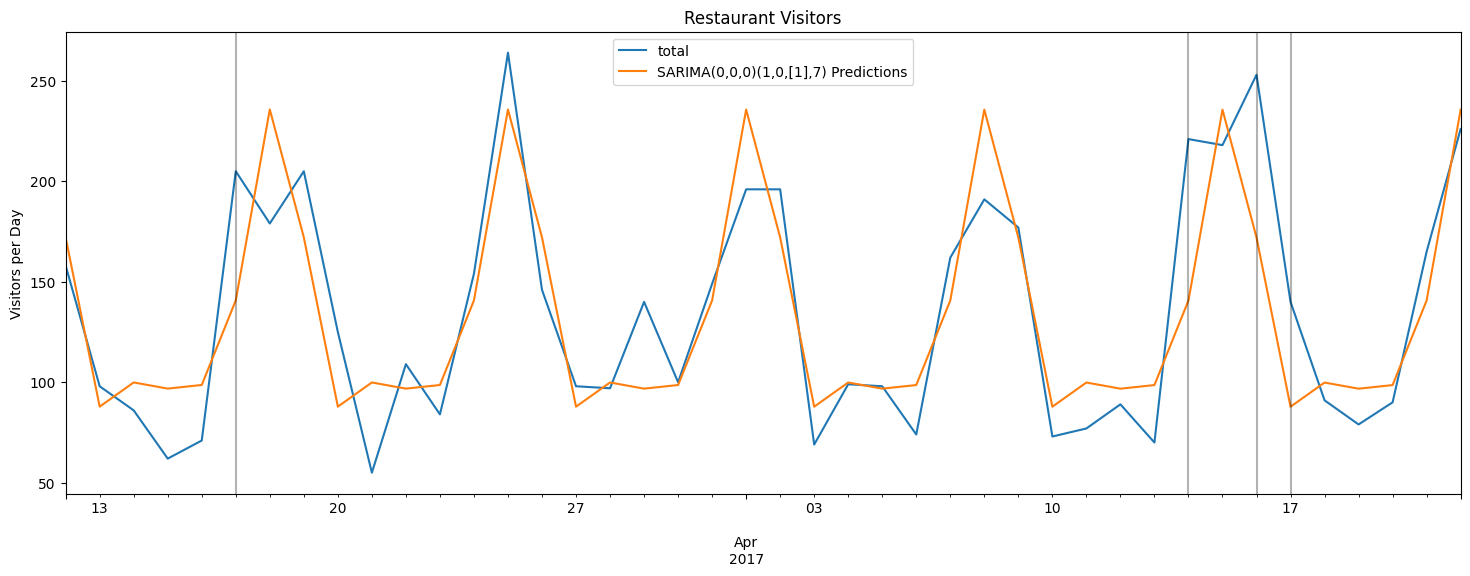

In [40]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

Podemos ver que la variable exógena (vacaciones) tuvo un impacto positivo en el pronóstico al aumentar los valores previstos.

## Evalúe las predicciones del modelo con la variable exógena incluida y compárelas con los errores del modelo anterior

In [41]:
# Print values from SARIMA above
print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {mse_error:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {rmse_error:11.10}')
print()

mse_error_x = mse(test['total'], pred2)
rmse_error_x = rmse(test['total'], pred2)

# SARIMAX con Exogenas
print("Con Exogenas")
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {mse_error_x:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {rmse_error_x:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1018.371644
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 31.91193577

Con Exogenas
SARIMAX(1,0,0)(2,0,0,7) MSE Error: 538.9237705
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 23.21473176


Claramente, el modelo funciona mejor cuando incluimos el feriado del regresor exógeno en el entrenamiento. Ahora bien, este modelo es lo suficientemente bueno como para realizar pronósticos en el futuro real. Entrenaremos un nuevo modelo en todo el conjunto de datos incluido con la variable exógena.

# Modelo agregando 2 Exogenas

In [42]:
train

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296,74.00
2016-01-02,Saturday,0,na,24,39,43,85,191,47.75
2016-01-03,Sunday,0,na,24,31,66,81,202,50.50
2016-01-04,Monday,0,na,23,18,32,32,105,26.25
2016-01-05,Tuesday,0,na,2,15,38,43,98,24.50
...,...,...,...,...,...,...,...,...,...
2017-03-07,Tuesday,0,na,28,9,19,13,69,17.25
2017-03-08,Wednesday,0,na,27,19,35,21,102,25.50
2017-03-09,Thursday,0,na,63,22,13,13,111,27.75


In [43]:
model3 = SARIMAX(train['total'],exog = train[['holiday', "rest1"]],order=(0,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)
resultado3 = model3.fit()
resultado3.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11697D+00    |proj g|=  1.77541D-01


 This problem is unconstrained.



At iterate    5    f=  4.84570D+00    |proj g|=  1.27886D-01

At iterate   10    f=  4.72731D+00    |proj g|=  3.76402D-01

At iterate   15    f=  4.62677D+00    |proj g|=  2.98571D-03

At iterate   20    f=  4.62657D+00    |proj g|=  2.46221D-02

At iterate   25    f=  4.62122D+00    |proj g|=  5.98909D-02

At iterate   30    f=  4.61776D+00    |proj g|=  6.08918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   2.800D-05   4.618D+00
  F =   4.6177505722023566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2013.339
Date:                   Thu, 26 Sep 2024   AIC                           4036.678
Time:                           14:50:24   BIC                           4057.067
Sample:                       01-01-2016   HQIC                          4044.725
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       55.0384      2.968     18.543      0.000      49.221      60.856
rest1          1.1221      0.067     16.625      0.000       0.990       1.254
ar.S.L7        0.9997      0.000   5012.316      0.000       0.999       1.000
ma.S.L7       -0.9075      0.026    -35.150      0.000      -0.958      -0.857
sigma2       557.8612     31.082     17.948      0.000     496.942     618.781
===================================================================================
Ljung-Box (L1) (Q):                  18.64   Jarque-Bera (JB):                26.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Obtain the predicted values
start = len(train)
end = len(train)+len(test)-1
exog_forecast = test[['holiday', "rest1"]] 
pred3 =  resultado3.predict(start =start,end=end,exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,[1],7) X2')
pred3

2017-03-12    174.332697
2017-03-13     97.375888
2017-03-14     91.409268
2017-03-15     79.517651
2017-03-16     88.984031
2017-03-17    227.770908
2017-03-18    221.852758
2017-03-19    159.712999
2017-03-20     87.263898
2017-03-21     72.315343
2017-03-22    103.065206
2017-03-23     87.847481
2017-03-24    146.899795
2017-03-25    248.746866
2017-03-26    159.681023
2017-03-27     78.274042
2017-03-28     91.373907
2017-03-29    109.780786
2017-03-30     95.687989
2017-03-31    145.753999
2017-04-01    217.290125
2017-04-02    200.045805
2017-04-03     76.016982
2017-04-04    118.287399
2017-04-05    115.374239
2017-04-06     79.963732
2017-04-07    152.463132
2017-04-08    221.741614
2017-04-09    183.181867
2017-04-10     72.637793
2017-04-11     93.582828
2017-04-12    115.357037
2017-04-13     76.582929
2017-04-14    191.768044
2017-04-15    219.460322
2017-04-16    242.676854
2017-04-17    174.792952
2017-04-18    101.420087
2017-04-19     88.408674
2017-04-20     79.934921


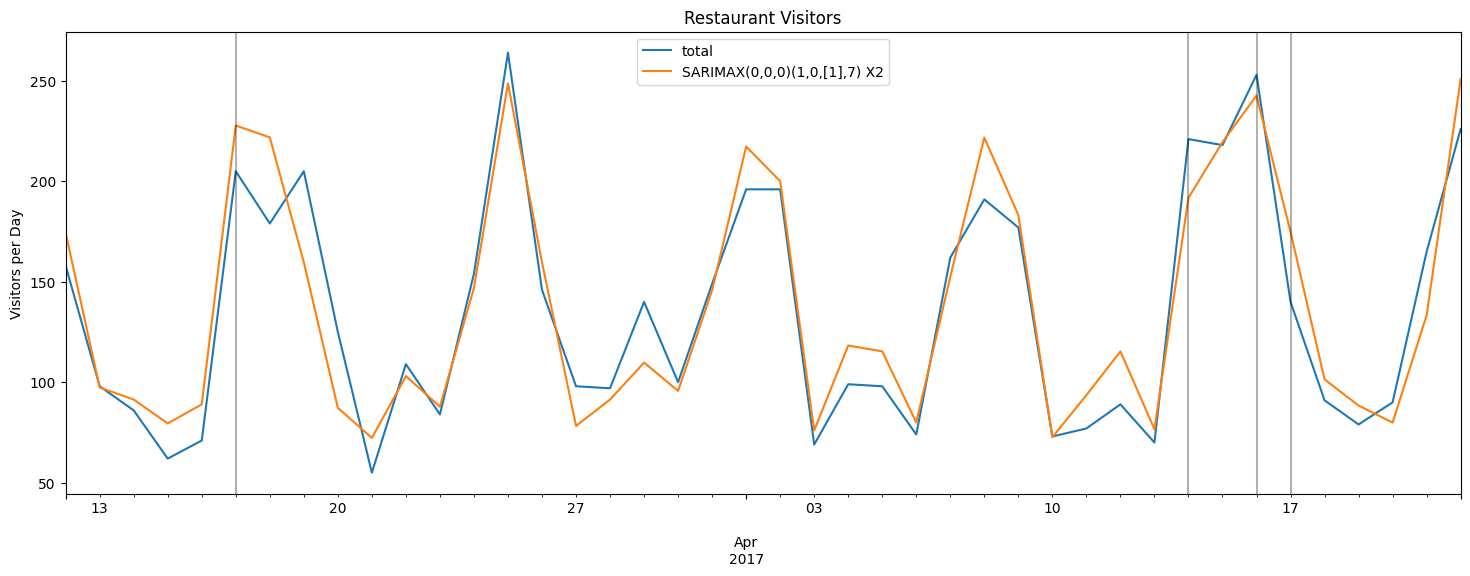

In [45]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred3.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

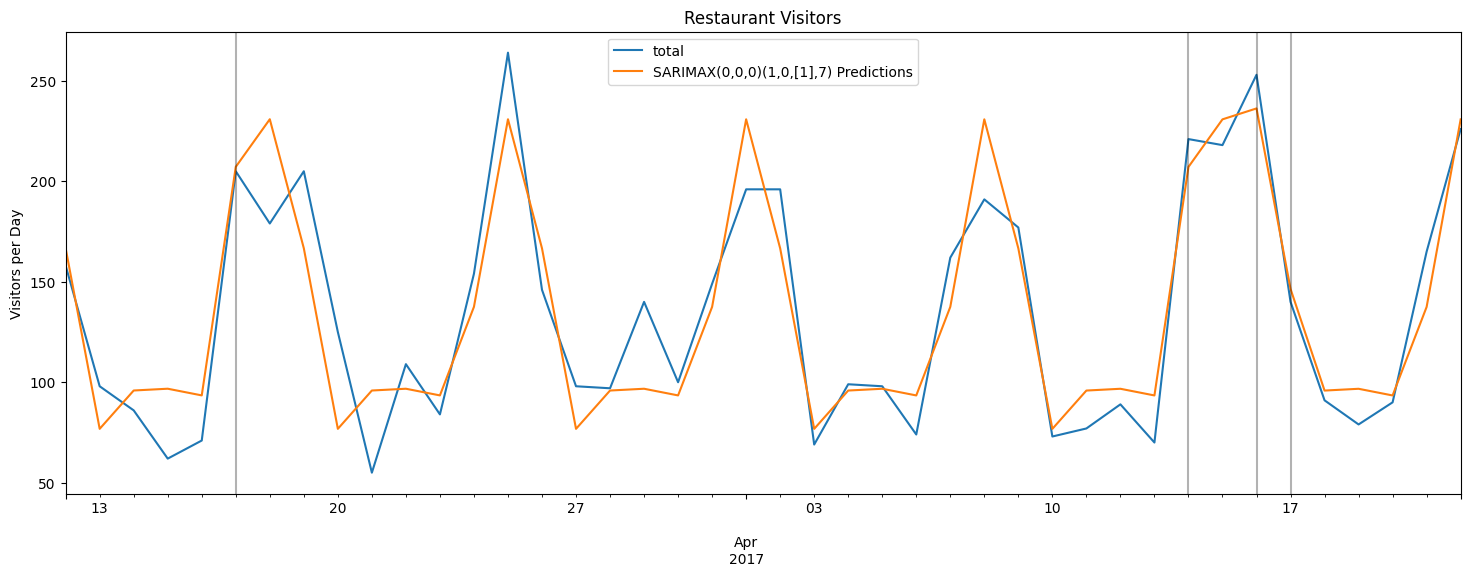

In [46]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

In [47]:
mse_error_x2 = mse(test['total'], pred3)
rmse_error_x2 = rmse(test['total'], pred3)

# SARIMAX con Exogenas
print("Con Exogenas")
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {mse_error_x2:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {rmse_error_x2:11.10}')

Con Exogenas
SARIMAX(1,0,0)(2,0,0,7) MSE Error: 389.2161268
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 19.72856119


# Modelo Agregando 3 Exogenas

In [57]:
model4 = SARIMAX(train['total'],exog = train[['holiday', "rest1", "rest2"]],order=(0,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)
resultado4 = model4.fit()
resultado4.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81422D+00    |proj g|=  2.56176D-01


 This problem is unconstrained.



At iterate    5    f=  4.63912D+00    |proj g|=  2.72100D-02

At iterate   10    f=  4.55817D+00    |proj g|=  1.25356D-01

At iterate   15    f=  4.47611D+00    |proj g|=  2.64415D-03

At iterate   20    f=  4.47594D+00    |proj g|=  1.70786D-02

At iterate   25    f=  4.47046D+00    |proj g|=  2.06501D-02

At iterate   30    f=  4.46929D+00    |proj g|=  7.62353D-04

At iterate   35    f=  4.46925D+00    |proj g|=  1.08282D-02

At iterate   40    f=  4.46812D+00    |proj g|=  1.85952D-02

At iterate   45    f=  4.46722D+00    |proj g|=  4.33269D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     57   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -1947.708
Date:                   Thu, 26 Sep 2024   AIC                           3907.416
Time:                           14:55:07   BIC                           3931.882
Sample:                       01-01-2016   HQIC                          3917.071
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       49.4684      2.341     21.135      0.000      44.881      54.056
rest1          1.0167      0.059     17.187      0.000       0.901       1.133
rest2          0.9716      0.086     11.265      0.000       0.803       1.141
ar.S.L7        0.9996      0.000   3993.151      0.000       0.999       1.000
ma.S.L7       -0.8994      0.026    -34.603      0.000      -0.950      -0.848
sigma2       414.8537     21.496     19.299      0.000     372.721     456.986
===================================================================================
Ljung-Box (L1) (Q):                   9.04   Jarque-Bera (JB):                73.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.35
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# Obtain the predicted values
start = len(train)
end = len(train)+len(test)-1
exog_forecast = test[['holiday', "rest1", "rest2"]] 
pred4 =  resultado4.predict(start =start,end = end, exog = exog_forecast).rename('SARIMAX(0,0,0)(1,0,[1],7) X3')
pred4

2017-03-12    167.685381
2017-03-13    104.887695
2017-03-14     82.829287
2017-03-15     72.236711
2017-03-16     74.611764
2017-03-17    221.095454
2017-03-18    212.495815
2017-03-19    163.173705
2017-03-20     93.780229
2017-03-21     69.414160
2017-03-22    113.975070
2017-03-23     88.155590
2017-03-24    162.797239
2017-03-25    245.601063
2017-03-26    165.077854
2017-03-27     94.377054
2017-03-28     93.481388
2017-03-29    121.031057
2017-03-30     94.287373
2017-03-31    153.987855
2017-04-01    205.434719
2017-04-02    195.810157
2017-04-03     64.153264
2017-04-04    101.347086
2017-04-05    101.808774
2017-04-06     69.352620
2017-04-07    150.352128
2017-04-08    202.660553
2017-04-09    190.236739
2017-04-10     67.890365
2017-04-11     92.564509
2017-04-12     89.162225
2017-04-13     67.260685
2017-04-14    216.658101
2017-04-15    200.587440
2017-04-16    247.619272
2017-04-17    171.705009
2017-04-18    107.436430
2017-04-19     73.490245
2017-04-20     61.552917


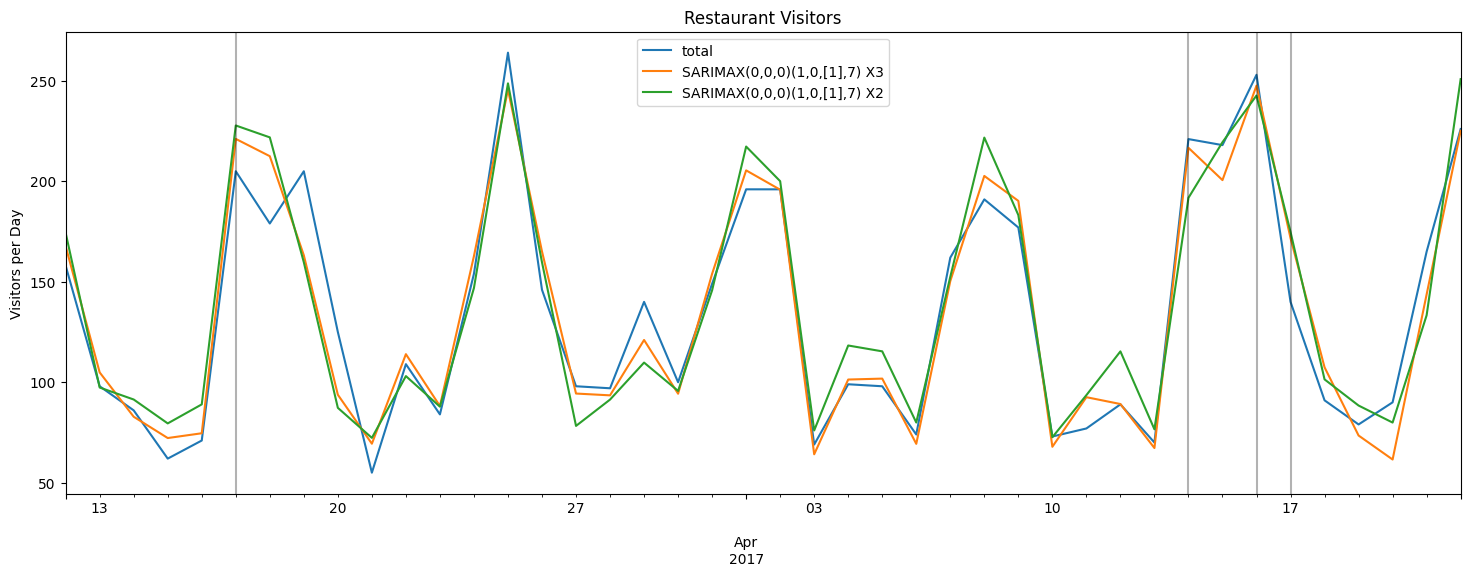

In [63]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
pred4.plot(legend=True)
pred3.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

In [56]:
mse_error_x3 = mse(test['total'], pred4)
rmse_error_x3 = rmse(test['total'], pred4)

# SARIMAX con Exogenas
print("Con Exogenas")
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {mse_error_x2:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {rmse_error_x2:11.10}')

Con Exogenas
SARIMAX(1,0,0)(2,0,0,7) MSE Error: 389.2161268
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 19.72856119


## Con 4 exogenas

In [103]:
model5 = SARIMAX(train['total'],exog = train[['holiday', "rest1", "rest2", "mean"]],order=(0,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)
resultado5 = model5.fit()
resultado5.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05919D+01    |proj g|=  2.55872D+07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.559D+07  -1.059D+01
  F =  -10.591904909199030     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood                4618.071
Date:                   Thu, 26 Sep 2024   AIC                          -9222.141
Time:                           15:18:11   BIC                          -9193.598
Sample:                       01-01-2016   HQIC                         -9210.876
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1.421e-14   1.63e-24   -8.7e+09      0.000   -1.42e-14   -1.42e-14
rest1      -1.818e-15   7.26e-22   -2.5e+06      0.000   -1.82e-15   -1.82e-15
rest2      -5.551e-17   1.11e-22  -5.01e+05      0.000   -5.55e-17   -5.55e-17
mean           4.0000   2.11e-22    1.9e+22      0.000       4.000       4.000
ar.S.L7        0.8707   5.97e-21   1.46e+20      0.000       0.871       0.871
ma.S.L7       -0.6727   2.64e-21  -2.55e+20      0.000      -0.673      -0.673
sigma2          1e-10   9.49e-11      1.054      0.292    -8.6e-11    2.86e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                39.87
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.40
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.1e+41. Standard errors may be unstable.
"""

In [104]:
# Obtain the predicted values
start = len(train)
end = len(train)+len(test)-1
exog_forecast = test[['holiday', "rest1", "rest2", "mean"]] 
pred5 =  resultado5.predict(start =start,end = end, exog = exog_forecast ).rename('SARIMAX(0,0,0)(1,0,[1],7) X4')
pred5

2017-03-12    158.0
2017-03-13     98.0
2017-03-14     86.0
2017-03-15     62.0
2017-03-16     71.0
2017-03-17    205.0
2017-03-18    179.0
2017-03-19    205.0
2017-03-20    125.0
2017-03-21     55.0
2017-03-22    109.0
2017-03-23     84.0
2017-03-24    154.0
2017-03-25    264.0
2017-03-26    146.0
2017-03-27     98.0
2017-03-28     97.0
2017-03-29    140.0
2017-03-30    100.0
2017-03-31    149.0
2017-04-01    196.0
2017-04-02    196.0
2017-04-03     69.0
2017-04-04     99.0
2017-04-05     98.0
2017-04-06     74.0
2017-04-07    162.0
2017-04-08    191.0
2017-04-09    177.0
2017-04-10     73.0
2017-04-11     77.0
2017-04-12     89.0
2017-04-13     70.0
2017-04-14    221.0
2017-04-15    218.0
2017-04-16    253.0
2017-04-17    140.0
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
Freq: D, Name: SARIMAX(0,0,0)(1,0,[1],7) X4, dtype: float64

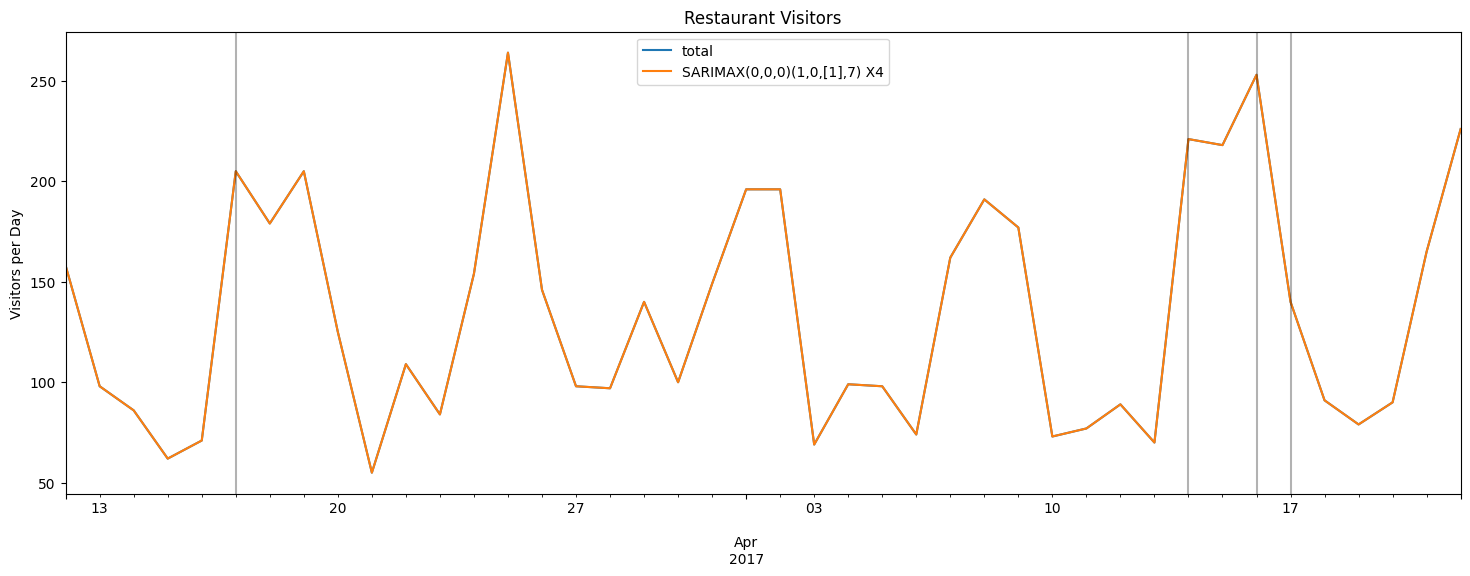

In [105]:
title = 'Restaurant Visitors'
ylabel = 'Visitors per Day'
xlabel = ''

ax = test['total'].plot(legend=True,title=title)
#pred4.plot(legend=True)
#pred3.plot(legend=True)
pred5.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test[test['holiday']==1].index:
    ax.axvline(x=x,color='k',alpha=0.3)

In [106]:
mse_error_x4 = mse(test['total'], pred5)
rmse_error_x4 = rmse(test['total'], pred5)

# SARIMAX con Exogenas
print("Con Exogenas")
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {mse_error_x4:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {rmse_error_x4:11.10}')

Con Exogenas
SARIMAX(1,0,0)(2,0,0,7) MSE Error: 6.010368802e-28
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 2.451605352e-14


In [107]:
test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,mean
date,,,,,,,,,
2017-03-12,Sunday,0,na,46,16,55,41,158,39.50
2017-03-13,Monday,0,na,43,24,18,13,98,24.50
2017-03-14,Tuesday,0,na,21,14,22,29,86,21.50
2017-03-15,Wednesday,0,na,12,18,21,11,62,15.50
2017-03-16,Thursday,0,na,30,8,24,9,71,17.75
2017-03-17,Friday,1,St. Patrick's Day,73,45,37,50,205,51.25
2017-03-18,Saturday,0,na,71,34,30,44,179,44.75
2017-03-19,Sunday,0,na,33,25,68,79,205,51.25
2017-03-20,Monday,0,na,34,22,19,50,125,31.25


In [113]:
import matplotlib.pyplot as plt

# Obtener las predicciones y los intervalos de predicción
forecast = resultado5.get_forecast(steps=len(exog_forecast), exog=exog_forecast)
predicciones = forecast.predicted_mean

# intervalos de predicciones
intervalos = forecast.conf_int()
intervalos

,lower total,upper total
2017-03-12,157.999980,158.000020
2017-03-13,97.999980,98.000020
2017-03-14,85.999980,86.000020
2017-03-15,61.999980,62.000020
2017-03-16,70.999980,71.000020
2017-03-17,204.999980,205.000020
2017-03-18,178.999980,179.000020
2017-03-19,204.999980,205.000020
2017-03-20,124.999980,125.000020
2017-03-21,54.999980,55.000020


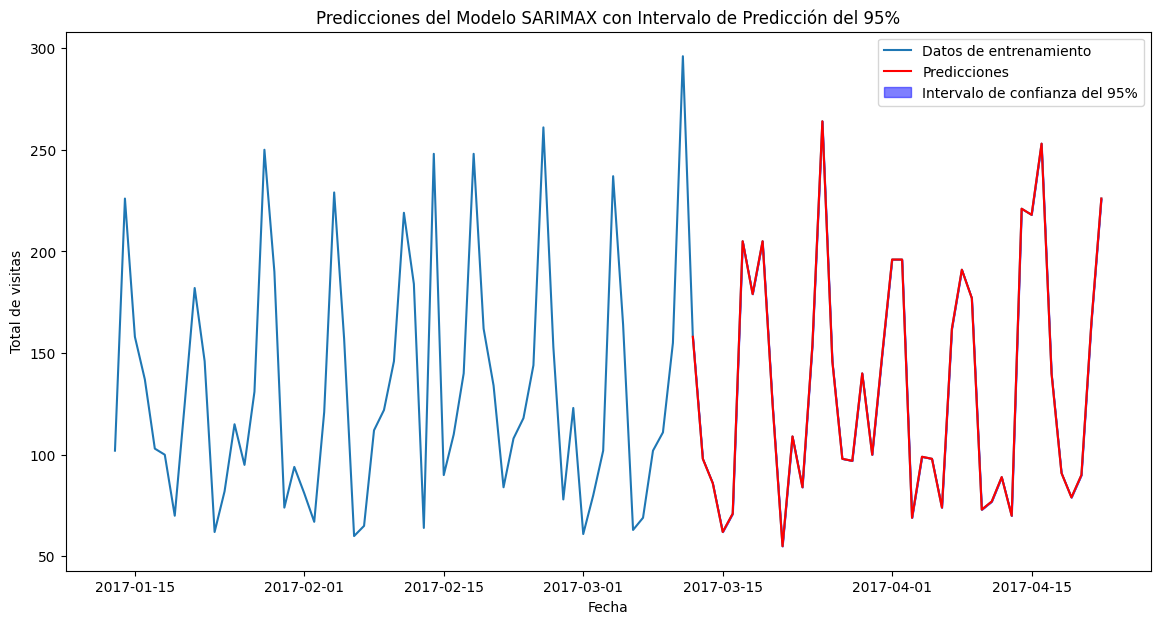

In [115]:
# Graficar las predicciones y los intervalos de predicción
plt.figure(figsize=(14, 7))
plt.plot(df1['total'].tail(100), label='Datos de entrenamiento')
plt.plot(predicciones, color='r', label='Predicciones')
plt.fill_between(intervalos.index, intervalos.iloc[:, 0], intervalos.iloc[:, 1], color='blue', alpha=0.5, label='Intervalo de confianza del 95%')
plt.xlabel('Fecha')
plt.ylabel('Total de visitas')
plt.title('Predicciones del Modelo SARIMAX con Intervalo de Predicción del 95%')
plt.legend()
plt.show()